   # 4. Reconocimiento de Imágenes Sign Gestures

En este ejercicio se utilizará el dataset de Sign Gestures el que consiste en 32627 imagenes donde en cada una hay una letra en lenguaje de señas. El dataset viene separado en 27455 ejemplos de entrenamiento y 7172 de pruebas. Las clases son mutuamente excluyentes y las imagenes tienen una resolución de 28x28 pixeles representados en una escala de grises 0-255.

### a) Carga de datos

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

def load_data():
    train = pd.read_csv('sign_mnist_train.csv')
    test = pd.read_csv('sign_mnist_test.csv')
    y_tr = train['label']
    x_tr = train.iloc[:,1:]
    delete_from_train = int(0.2*len(x_tr))
    validate = len(x_tr) - delete_from_train
    #you need to add Xval: x_v,y_v
    x_v = train.iloc[validate:len(x_tr),1:]
    y_v = train['label'][validate:len(x_tr)]
    y_tr = y_tr.drop(y_tr.tail(delete_from_train).index)
    x_tr = x_tr.drop(x_tr.tail(delete_from_train).index)
    y_t = test['label']
    x_t = test.iloc[:,1:]
    
    
    return(x_tr,x_v,x_t,y_tr,y_v,y_t)
x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()
print("Conjunto de entrenamiento: ",x_tr.shape)
print("Conjunto de validación: ",x_v.shape)
print("Conjunto de entrenamiento: ",x_t.shape)


Conjunto de entrenamiento:  (21964, 784)
Conjunto de validación:  (5491, 784)
Conjunto de entrenamiento:  (7172, 784)


784
Etiqueta: 6


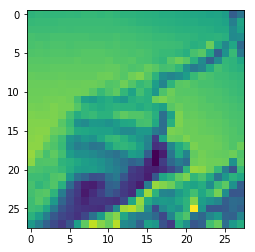

Etiqueta: 2


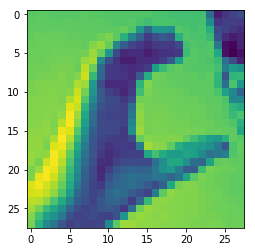

In [78]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
X = x_tr.values
print(len(X[0]))

def ver_imagen(X,y,n):
    print("Etiqueta:",y[n])
    images = X[n].reshape(28, 28)
    plt.imshow(images)
    plt.show()

#Ejemplos
ver_imagen(X,y_tr,1)
ver_imagen(X,y_tr,2)


En la celda anterior, se generaron 2 matrices corespondiente a las imágenes y etiquetas de entrenamiento : $X_{tr},y_{tr}$ ambos poseen 21964 elementos. Se dividió este dataset para crear el conjunto de validación, el cual corresponde al 20% de elementos del conjunto de entrenamiento, por lo tanto, $X_{v},y_{v}$ poseen 5491 elementos. El conjunto de pruebas $X_{t},y_{t}$ en el cual se evaluarán los distintos algoritmos está compuesto de 7172. Cabe recordar que cada imagen está guardada como un arreglo de 28x28 , esto es de 784 pixeles.

### b) Pre-procesamiento de imágenes

En la siguiente celda se construye una función que tiene 2 opciones, una consiste en **sólo escalar** los datos, esto es dividir por la intensidad máxima de pixel en el dataset, la otra **centra y escala** los datos según su varianza.

In [2]:
# Escalar y centrar datos
from sklearn.preprocessing import StandardScaler

def scaler_t(X,Xv,Xt,scaler_type):
    if scaler_type == "escalar":
        scaler= StandardScaler(with_std=False).fit(X)
        print("Se han escalado las imágenes")
        return scaler.transform(X), scaler.transform(Xv), scaler.transform(Xt)
    elif scaler_type == "centrar_escalar":
        scaler= StandardScaler(with_std=True).fit(X)
        print("Se han centrado y escalado las imágenes")
        return scaler.transform(X), scaler.transform(Xv), scaler.transform(Xt)
    else: #otro
        print("Opción no registrada")




### c) Diseñar y entrenar una red neuronal con error de pruebas < 0.2 

En este item se pide diseñar, entrenar y evaluar una red con distintas representaciones y arquitecturas con tal de obtener un error menor al 20% en el conjunto de prueba. Para analizar cual de los modelos probar, se utilizará el conjunto de validación.

In [7]:
# Creacion de conjuntos centrados y escalados.
px_tr,px_v,px_t = scaler_t(x_tr,x_v,x_t,"centrar_escalar")
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical

Se han centrado y escalado las imágenes


En primera instancia analizaremos cómo se comporta la red con la representación **original** , con una configuración con 3 capas ocultas, y función de pérdida categorical_crossentropy por el carácter multilabel de la clasificación, se realizarán 100 epochs : 

In [29]:
model = Sequential()
model.add(Dense(30, input_dim=x_tr.shape[1], init='uniform', activation='relu'))
model.add(Dense(30, init='uniform', activation='relu'))
model.add(Dense(25, init='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_tr, to_categorical(y_tr), nb_epoch=50, batch_size=128, verbose=1)
evaluate = model.evaluate(x_v,to_categorical(y_v)) 
print("test accuracy:",evaluate[1])

c:\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, activation="relu", kernel_initializer="uniform")`
  import sys
c:\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="relu", kernel_initializer="uniform")`
  
c:\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="softmax", kernel_initializer="uniform")`
  if __name__ == '__main__':
c:\anaconda3\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/50
21964/21964 [==============================] - 8s 344us/step - loss: 15.2950 - acc: 0.0445
Epoch 2/50
21964/21964 [==============================] - 4s 186us/step - loss: 15.3931 - acc: 0.0450
Epoch 3/50
21964/21964 [==============================] - 4s 187us/step - loss: 15.3931 - acc: 0.0450
Epoch 4/50
21964/21964 [==============================] - 4s 191us/step - loss: 15.3931 - acc: 0.0450
Epoch 5/50
21964/21964 [==============================] - 4s 190us/step - loss: 15.3931 - acc: 0.0450
Epoch 6/50
21964/21964 [==============================] - 4s 187us/step - loss: 15.3931 - acc: 0.0450
Epoch 7/50
21964/21964 [==============================] - 4s 189us/step - loss: 15.3931 - acc: 0.0450
Epoch 8/50
21964/21964 [==============================] - 4s 193us/step - loss: 15.3931 - acc: 0.0450
Epoch 9/50
21964/21964 [==============================] - 4s 193us/step - loss: 15.3931 - acc: 0.0450
Epoch 10/50
21964/21964 [==============================] - 4s 188us/step - loss: 1

Realizaremos el mismo procedimiento pero con la representación centrada y escalada : 

In [30]:
model = Sequential()
model.add(Dense(30, input_dim=px_tr.shape[1], init='uniform', activation='relu'))
model.add(Dense(30, init='uniform', activation='relu'))
model.add(Dense(25, init='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(px_tr, to_categorical(y_tr), nb_epoch=50, batch_size=128, verbose=1)          
evaluate = model.evaluate(px_v,to_categorical(y_v)) 
print("test accuracy:",evaluate[1])

c:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, activation="relu", kernel_initializer="uniform")`
  
c:\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="softmax", kernel_initializer="uniform")`
  after removing the cwd from sys.path.
c:\anaconda3\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/50
21964/21964 [==============================] - 7s 305us/step - loss: 3.1989 - acc: 0.0859
Epoch 2/50
21964/21964 [==============================] - 4s 187us/step - loss: 2.9280 - acc: 0.1365
Epoch 3/50
21964/21964 [==============================] - 4s 195us/step - loss: 2.2820 - acc: 0.2643
Epoch 4/50
21964/21964 [==============================] - 4s 201us/step - loss: 1.6295 - acc: 0.4490
Epoch 5/50
21964/21964 [==============================] - 5s 207us/step - loss: 1.1310 - acc: 0.6212
Epoch 6/50
21964/21964 [==============================] - 4s 204us/step - loss: 0.7851 - acc: 0.7458
Epoch 7/50
21964/21964 [==============================] - 5s 210us/step - loss: 0.5462 - acc: 0.8380
Epoch 8/50
21964/21964 [==============================] - 5s 214us/step - loss: 0.3695 - acc: 0.9036
Epoch 9/50
21964/21964 [==============================] - 4s 204us/step - loss: 0.2422 - acc: 0.9483
Epoch 10/50
21964/21964 [==============================] - 5s 211us/step - loss: 0.1583 - a

In [17]:
from sklearn.metrics import accuracy_score
evaluate = model.evaluate(px_t,to_categorical(y_t)) 
print(evaluate)
y_red = model.predict(px_v)
y_pred = []
for i in range(len(y_red)):
    lista = list(y_red[i])
    y_pred.append(lista.index(max(y_red[i])))
    
print(accuracy_score(y_pred,list(y_v)))



7172/7172 [==============================] - 0s 48us/step
[2.0101451818595968, 0.68251533742331283]
0.99981788381


Observando ambas redes y sus métricas en el conjunto de validación, se obtienen mejores resultados con la representación centrada y escalada, por lo tanto, probaremos distintas arquitecturas basadas en esta última representación:

#### Variando tasa de aprendizaje

c:\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, activation="relu", kernel_initializer="uniform")`
  
c:\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="relu", kernel_initializer="uniform")`
  if __name__ == '__main__':
c:\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="softmax", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
c:\anaconda3\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


5491/5491 [==============================] - 2s 282us/step


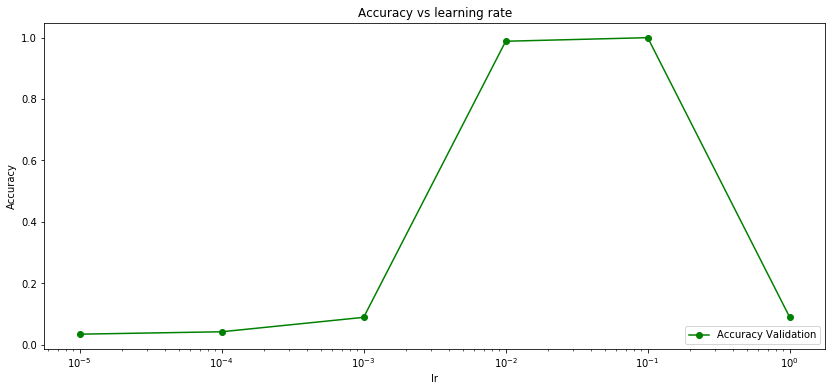

In [34]:
import numpy as np
import matplotlib.pyplot as plt

lrs = [0.00001,0.0001,0.001,0.01,0.1,1]
accuracys = []
for tasa in lrs:
    model = Sequential()
    model.add(Dense(30, input_dim=px_tr.shape[1], init='uniform', activation='relu'))
    model.add(Dense(30, init='uniform', activation='relu'))
    model.add(Dense(25, init='uniform', activation='softmax'))
    model.compile(optimizer=SGD(lr=tasa), loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(px_tr, to_categorical(y_tr), nb_epoch=50, batch_size=128, verbose=0,
              validation_data=(px_v,to_categorical(y_v)))
    evaluate = model.evaluate(px_v,to_categorical(y_v)) 
    accuracys.append(evaluate[1])

f,axarr = plt.subplots(1,figsize=(14,6))
axarr.plot(lrs,accuracys,'go-',label="Accuracy Validation")
axarr.set_title("Accuracy vs learning rate")
axarr.set_xlabel("lr")
axarr.set_ylabel('Accuracy')
axarr.set_xscale('log')
axarr.legend(loc="lower right", fancybox= True)
plt.show()

    
    

En base al gráfico anterior de *accuracy* en función de la tasa de aprendizaje, se puede observar que en el orden de $10^{-2}$ y $10^{-1}$ se encuentran los valores más altos de esta, por lo que en ese rango se van probando tasas de aprendizaje, luego de realizar un arduo proceso de sintonización se llegó que con una tasa 0.51 se obtiene la mayor *accuracy* .


A continuación se varía la cantidad de neuronas a 100 en la capa oculta:

In [38]:
best_model = Sequential()
best_model.add(Dense(30, input_dim=px_tr.shape[1], init='uniform', activation='relu'))
best_model.add(Dense(100, init='uniform', activation='relu'))
best_model.add(Dense(25, init='uniform', activation='softmax'))
best_model.compile(optimizer=SGD(lr=0.51), loss='categorical_crossentropy', metrics=['accuracy'])
hist = best_model.fit(px_tr, to_categorical(y_tr), nb_epoch=100, batch_size=128, verbose=1,
          validation_data=(px_v,to_categorical(y_v)))
evaluate = best_model.evaluate(px_t,to_categorical(y_t)) 
print("Accuracy best_model : %f" %evaluate[1])


c:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, activation="relu", kernel_initializer="uniform")`
  
c:\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="softmax", kernel_initializer="uniform")`
  after removing the cwd from sys.path.
c:\anaconda3\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 21964 samples, validate on 5491 samples
Epoch 1/100
21964/21964 [==============================] - 3s 142us/step - loss: 1.6913 - acc: 0.4697 - val_loss: 1.1661 - val_acc: 0.6855
Epoch 2/100
21964/21964 [==============================] - 3s 138us/step - loss: 0.6550 - acc: 0.8152 - val_loss: 0.3486 - val_acc: 0.9084
Epoch 3/100
21964/21964 [==============================] - 2s 84us/step - loss: 0.2185 - acc: 0.9519 - val_loss: 0.0107 - val_acc: 0.9993
Epoch 4/100
21964/21964 [==============================] - 3s 116us/step - loss: 0.0059 - acc: 0.9997 - val_loss: 0.0036 - val_acc: 1.0000
Epoch 5/100
21964/21964 [==============================] - 3s 131us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.0021 - val_acc: 0.9998
Epoch 6/100
21964/21964 [==============================] - 2s 70us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000
Epoch 7/100
21964/21964 [==============================] - 3s 136us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.001

21964/21964 [==============================] - 2s 89us/step - loss: 6.7918e-05 - acc: 1.0000 - val_loss: 1.4296e-04 - val_acc: 1.0000
Epoch 57/100
21964/21964 [==============================] - 3s 144us/step - loss: 6.6527e-05 - acc: 1.0000 - val_loss: 1.4089e-04 - val_acc: 1.0000
Epoch 58/100
21964/21964 [==============================] - 2s 106us/step - loss: 6.5182e-05 - acc: 1.0000 - val_loss: 1.3768e-04 - val_acc: 1.0000
Epoch 59/100
21964/21964 [==============================] - 4s 184us/step - loss: 6.3874e-05 - acc: 1.0000 - val_loss: 1.3608e-04 - val_acc: 1.0000
Epoch 60/100
21964/21964 [==============================] - 3s 142us/step - loss: 6.2642e-05 - acc: 1.0000 - val_loss: 1.3305e-04 - val_acc: 1.0000
Epoch 61/100
21964/21964 [==============================] - 2s 95us/step - loss: 6.1437e-05 - acc: 1.0000 - val_loss: 1.3171e-04 - val_acc: 1.0000
Epoch 62/100
21964/21964 [==============================] - 3s 152us/step - loss: 6.0303e-05 - acc: 1.0000 - val_loss: 1.3100e-

Con esta configuración se obtiene un accuracy de $\approx 78\%$ logrando llegar a un valor muy cercano a la cota mínima de error propuesto.

### d) Matriz de Confusión

Se construye la matriz de confusión para las distintas y así ver cuales son las clases más difíciles de clasificar y cuales son las que más confunden a la red neuronal.

In [42]:
from sklearn.metrics import confusion_matrix
# print(to_categorical(y_t[:10]))
y_red = list((best_model.predict(x_t)))
#print(y_red[0:10])
y_pred = []
for i in range(len(y_red)):
    z = [0]*len(y_red[i])
    lista = list(y_red[i])
    y_pred.append(lista.index(max(y_red[i])))
    
print("Matriz de Confusión:")
confusion_matrix(list(y_t), y_pred)

Matriz de Confusión:


array([[236,   0,   0,   0,   0,   0,   0,   0,  21,   8,   0,   0,   0,
          6,   0,   0,   0,   4,   0,   0,   0,   0,   0,  56],
       [  0, 249,   0,  18,   0,   0,   0,   0,   0, 157,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   8,   0,   0],
       [  0,   0, 234,   3,   0,  19,   0,   0,   0,   1,  49,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   2,   0,   2],
       [  0,   0,   0, 112,   0,   0,   0,   0,   0, 121,   0,   0,   0,
          0,   0,   0,   4,   0,   0,   8,   0,   0,   0,   0],
       [  0, 225,   0,   0, 184,   0,   0,   0,   0,  41,   0,   0,   0,
          0,   0,   0,   0,  48,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 139,   0,   0,   0,  97,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11],
       [  0,   0,   0,  34,   0,   0, 121,  21,   0,  64,  40,   0,   0,
          0,   0,   0,  37,   0,  20,   0,  11,   0,   0,   0],
       [  0,   0,   0,   0,  20,   0,  61

El caso más representativo es el elemento con etiqueta 4, el modelo predice 225 veces que corresponde al elemento con etiqueta 1 y sólo 184 a su propia clase.

Etiqueta: 1


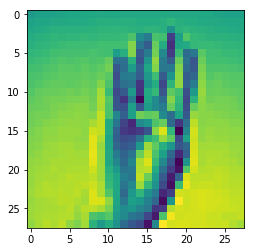

Etiqueta: 4


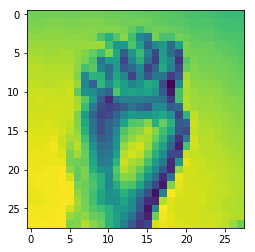

Etiqueta: 1


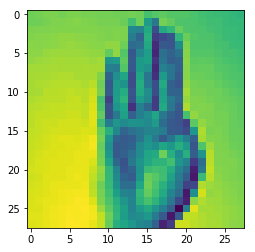

Etiqueta: 4


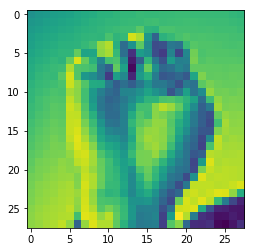

In [89]:
ver_imagen(X,y_tr,29)
ver_imagen(X,y_tr,60)
ver_imagen(X,y_tr,106)
ver_imagen(X,y_tr,113)

### e) SVM no lineal

A continuación se procede a entrenar una SVM no lineal, con la representación original ( pixeles sin pre-procesamiento ) y con la pre-procesada. Para modificar hiper-parámetros y tomar decisiones de diseño se utilizará el conjunto de validación.

In [4]:
from sklearn.svm import SVC as SVM
from sklearn.metrics import accuracy_score

# REPRESENTACIÓN ORIGINAL.

model= SVM()
model.set_params(C=0.01,kernel='rbf')
model.fit(x_tr,y_tr)
y_true = list(y_v)
y_pred = list(model.predict(x_v))
print("Miss Classification Loss sin procesamiento kernel rbf: %f"%(1-accuracy_score(y_true, y_pred)))

model= SVM()
model.set_params(C=0.01,kernel='poly')
model.fit(x_tr,y_tr)
y_true = list(y_v)
y_pred = list(model.predict(x_v))
print("Miss Classification Loss sin procesamiento kernel poly: %f"%(1-accuracy_score(y_true, y_pred)))

Miss Classification Loss sin procesamiento kernel rbf: 0.952103
Miss Classification Loss sin procesamiento kernel poly: 0.000000


In [5]:
# REPRESENTACIÓN PRE-PROCESADA
model= SVM()
model.set_params(C=0.01,kernel='rbf')
model.fit(px_tr,y_tr)
y_true = list(y_v)
y_pred = list(model.predict(px_v))
print("Miss Classification Loss con procesamiento kernel rbf: %f"%(1-accuracy_score(y_true, y_pred)))

model= SVM()
model.set_params(C=0.01,kernel='poly')
model.fit(px_tr,y_tr)
y_true = list(y_v)
y_pred = list(model.predict(px_v))
print("Miss Classification Loss con procesamiento kernel poly: %f"%(1-accuracy_score(y_true, y_pred)))

Miss Classification Loss con procesamiento kernel rbf: 0.645056
Miss Classification Loss con procesamiento kernel poly: 0.750501


### f) Árbol de clasificación

Continuando con los método no-lineales, se procede a entrenar el árbol con la misma idea, con y sin pre-procesamiento, se ajustará la profundidad máxima en base al conjunto de validación.

In [6]:
# Sin pre-procesamiento
from sklearn.tree import DecisionTreeClassifier as Tree
#Probarndo con n=10 , criterio entropy.

model = Tree() #edit the train_model function
model.set_params(max_depth=10,criterion='entropy',splitter='best')
model.fit(x_tr,y_tr)
y_true = list(y_v)
y_pred = model.predict(x_v)
print("Miss Classification Loss Tree sin pre-procesamiento: %f"%(1-accuracy_score(y_true, y_pred)))

# Pre procesado
model = Tree() #edit the train_model function
model.set_params(max_depth=10,criterion='entropy',splitter='best')
model.fit(px_tr,y_tr)
y_true = list(y_v)
y_pred = model.predict(px_v)
print("Miss Classification Loss Tree con pre-procesamiento: %f"%(1-accuracy_score(y_true, y_pred)))

Miss Classification Loss Tree sin pre-procesamiento: 0.220543
Miss Classification Loss Tree con pre-procesamiento: 0.218357
